# Import Libraries and Load Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import warnings
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix  # Import plot_decision_regions from mlxtend

# Suppress warnings (optional)
warnings.filterwarnings('ignore')

# Load the Wine dataset
wine = datasets.load_wine()

# Convert to a DataFrame for EDA
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

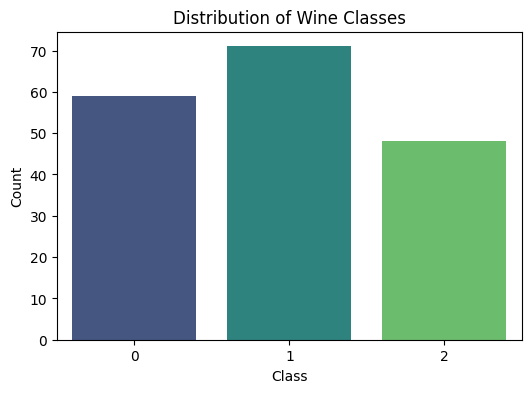

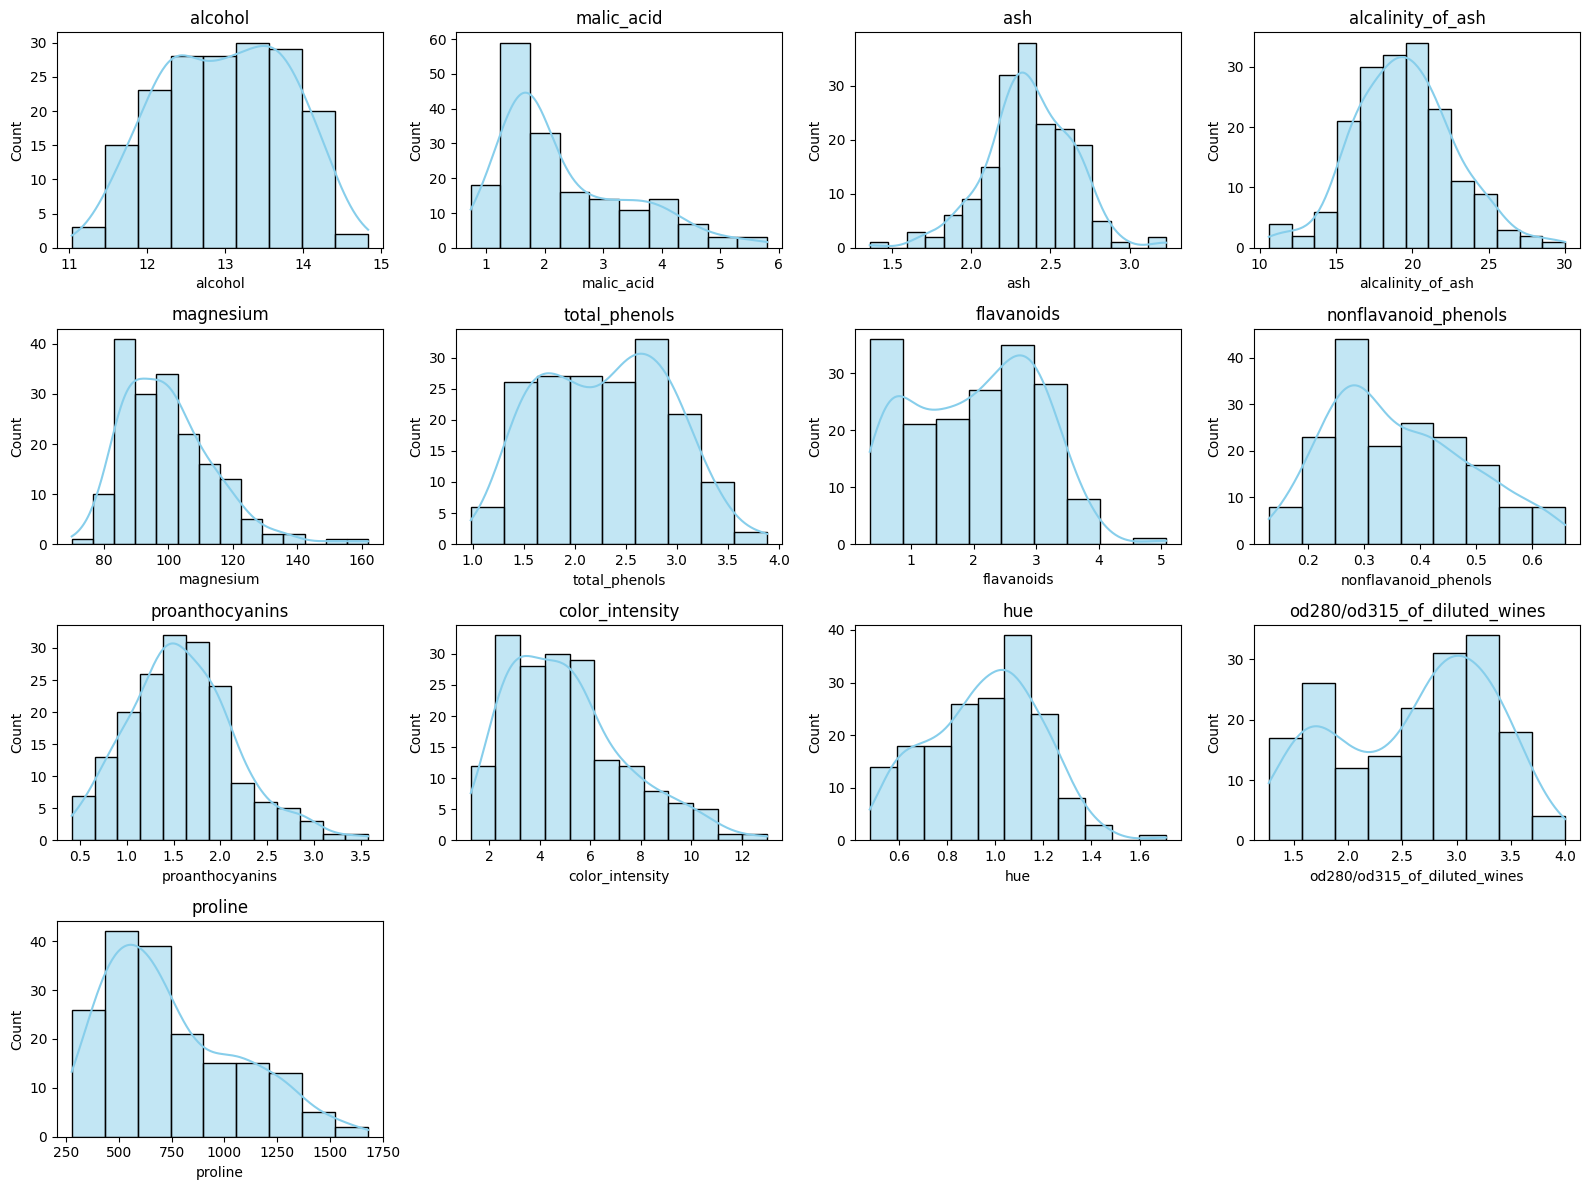

<Figure size 1200x800 with 0 Axes>

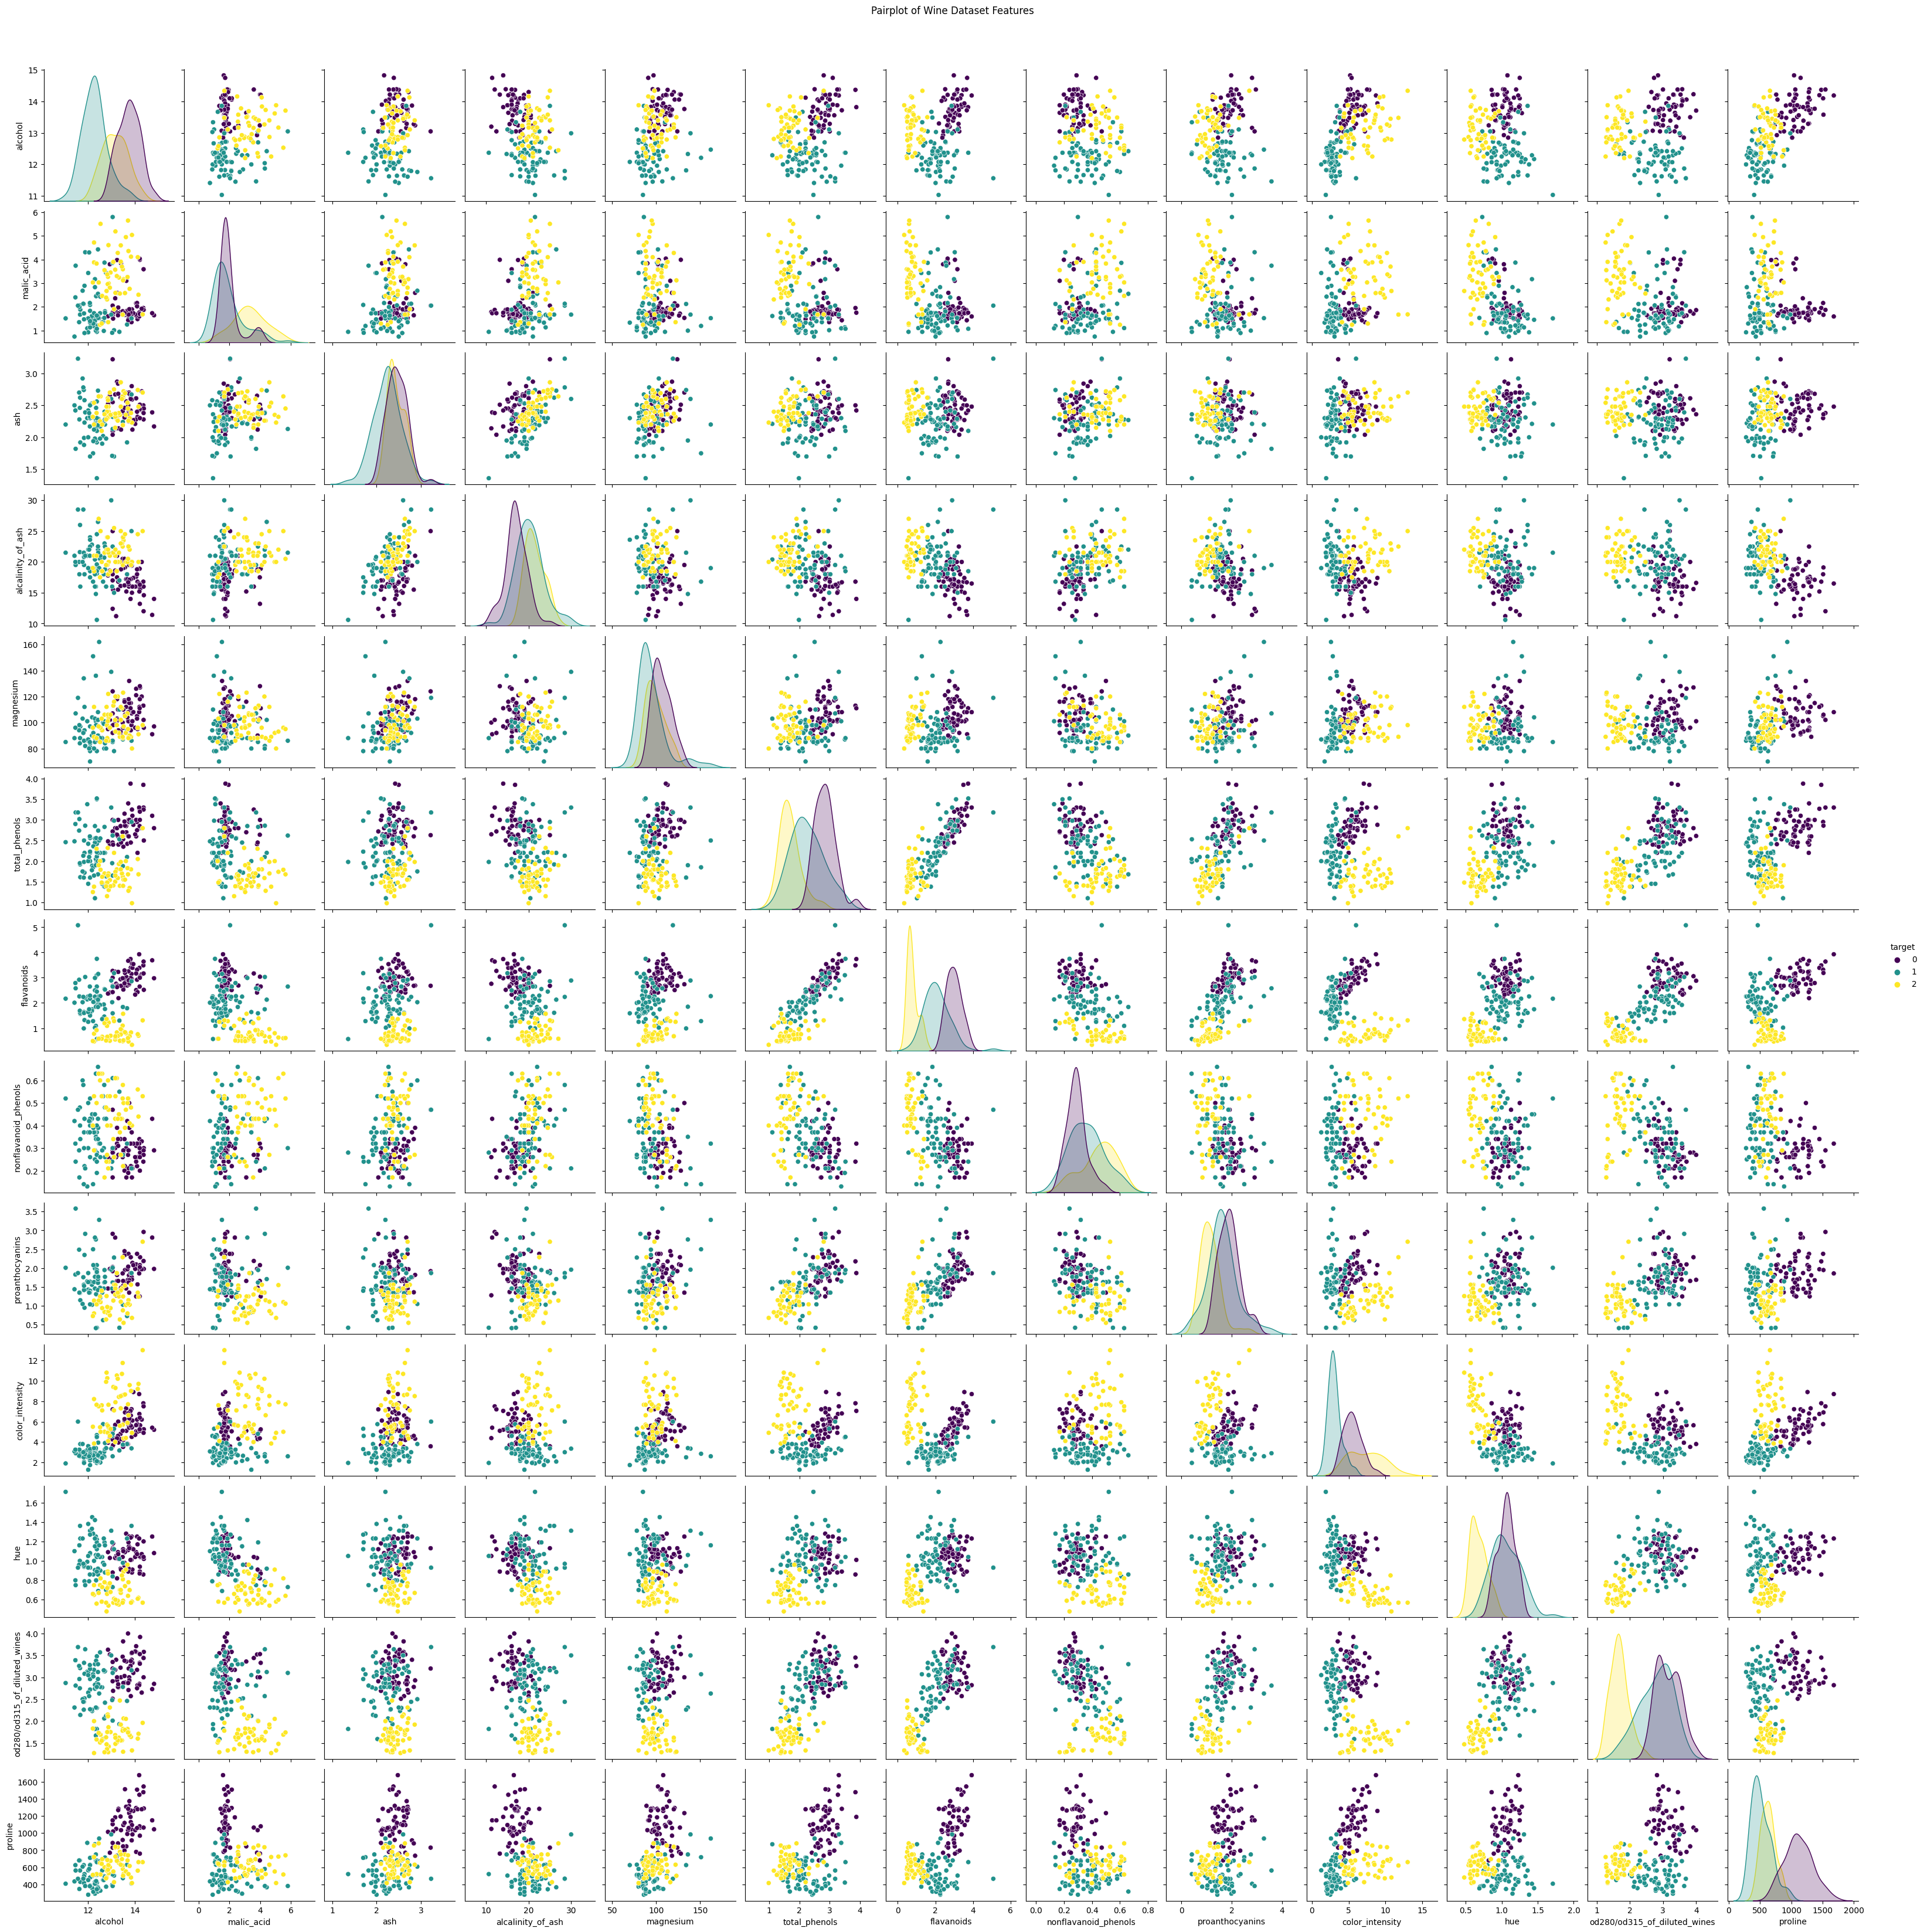

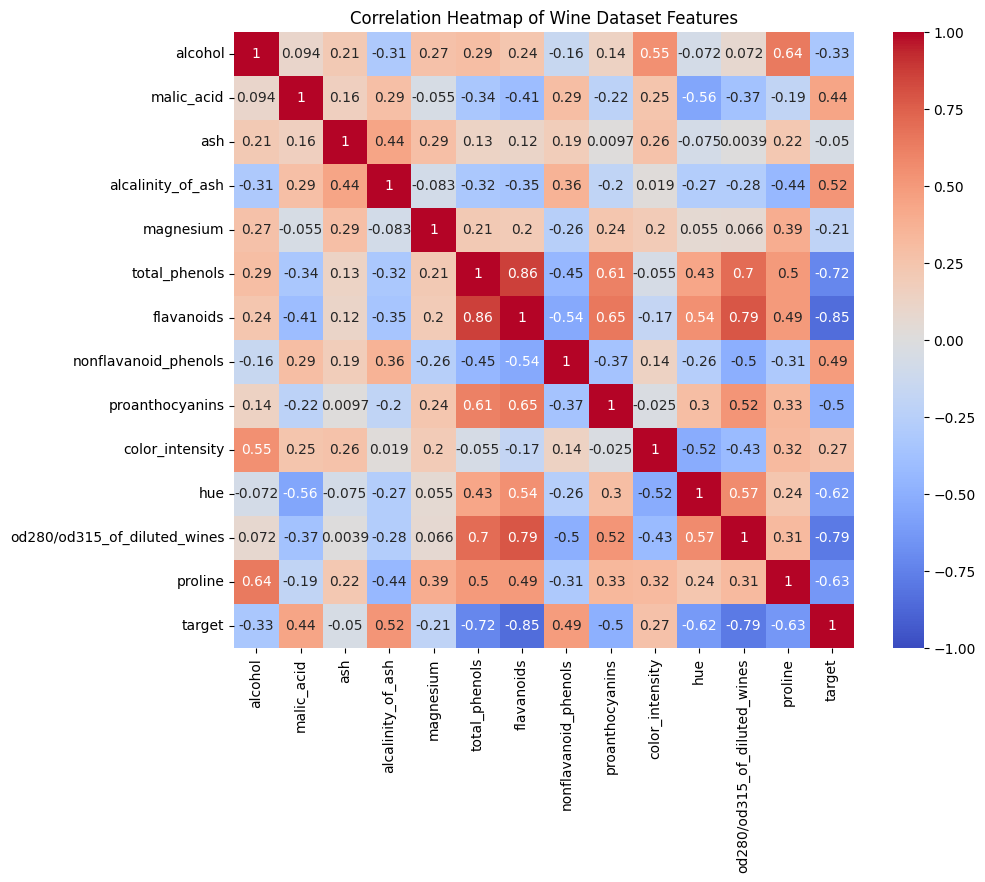

In [2]:
# Display basic information about the dataset
print(wine_df.info())

# Display the first few rows of the dataset
print(wine_df.head())

# Basic statistics of the dataset
print(wine_df.describe())

# Distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=wine_df, palette='viridis')
plt.title('Distribution of Wine Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Distributions of features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(wine.feature_names):
    plt.subplot(4, 4, i + 1)
    sns.histplot(wine_df[feature], kde=True, color='skyblue')
    plt.title(feature)
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(wine_df, hue='target', palette='viridis')
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
corr = wine_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Wine Dataset Features')
plt.show()

# Preprocessing and Splitting Data

In [3]:
# Split the data into features and target
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  SVM Model Training and Evaluation

In [4]:
# Initialize the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score}\n")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Accuracy: 0.984



# Model Evaluation and Visualization

Accuracy on Test Set: 0.9814814814814815

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



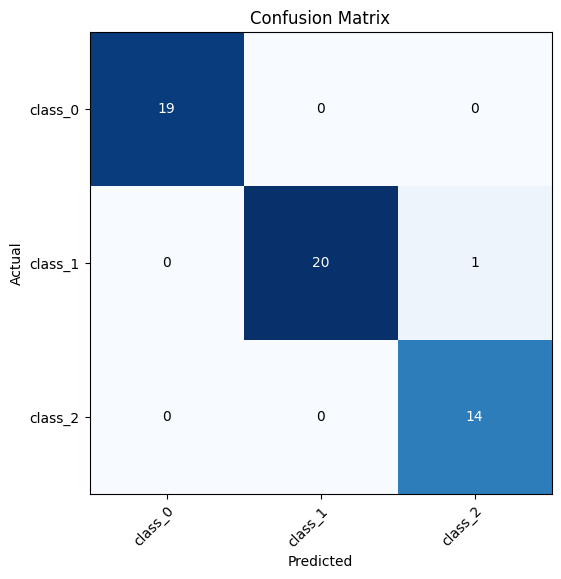

In [5]:
# Make predictions on the test set with the best model
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test_scaled)

# Evaluate the best model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}\n")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(8, 6), class_names=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()